# Pattern Mining - Домашнее Задание №1
### Выполнила Ирина Дёмина 

[Ссылка на текст задания](https://www.dropbox.com/s/niz1ncvssewokxl/HW_FIM_FCA.pdf?dl=0)

Задание 1а:

<img src = './images/problem-set-1a-text.png'>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_table('./data/a.txt')

In [3]:
data.head()

,12a1970 lexmark,2 stacker,21 black jack,2nd mortgage,acapulco hotel,accept account card credit merchant,accept card credit,accept card credit online,accessory computer,accessory desk,...,woman,work home,xenadrine,xenical,xenical on line,xxx,yohimbe,yukon,zinc,zyban
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# Заголовки массива - это конкретные кампании контекстной рекламы, например:

for col in data.columns[30:50]:
    print(col)

ad banner
ad personal
add url
address internet
address web
adds personal
adipex
adipex buy
adipex buy online
adipex cheap
adipex diet
adipex diet pill
adipex line
adipex online
adipex online order
adipex online prescription
adipex order
adipex p
adipex phentermine
adipex prescription


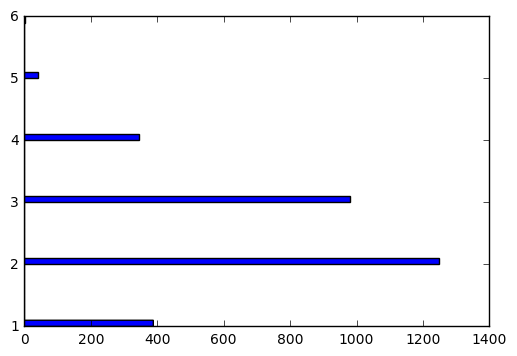

In [5]:
# Отдельные кампании построены на небольших словосочетаниях
# Не более 6 слов, большинство состоят из 2-3 слов

index = np.array(data.columns)
max_len = 0
index_len = []
for ind in index:
    ind_len = len(ind.split())
    index_len.append(ind_len)
    if ind_len > max_len:
        max_len = ind_len
        
plt.hist(index_len, bins=50, orientation='horizontal')
plt.show()

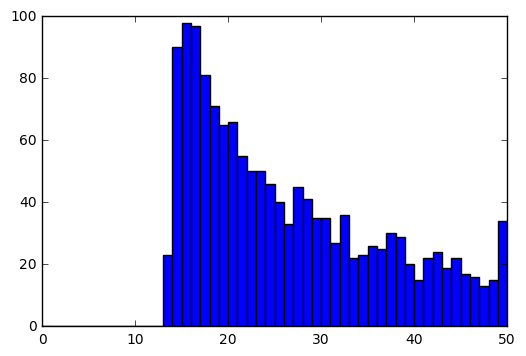

In [6]:
# Общее число кампаний каждого рекламодателя (привожу от 0 до 50 для наглядности).

plt.hist(np.sum(data, axis=1), bins=50, range=(0, 50))
plt.show()

In [7]:
# Максимальное число рекламный кампаний одного рекламодателя = 947

max(np.sum(data, axis=1))

947

In [8]:
def combine_campaings_per_firm_np(dataframe):
    prct = 0.0
    data = np.array(dataframe)
    max_row = data.shape[0]
    max_range = data.shape[1]
    output = []
    for row in range(max_row):
        if row%(max_row//10) == 0:
            print('{0:.2f}% done'.format(prct))
            prct += 10.0
        row_summary = []
        for col in range(max_range):
            if data[row, col] == 1:
                row_summary.append(col)
        output.append(row_summary)
    return output

In [9]:
%%time

# Конверсия данных в формат SPMF: каждая строка - положительные целые числа,
# упорядоченные по ворастанию

new_data = combine_campaings_per_firm_np(data)

0.00% done
10.00% done
20.00% done
30.00% done
40.00% done
50.00% done
60.00% done
70.00% done
80.00% done
90.00% done
CPU times: user 2.72 s, sys: 67.6 ms, total: 2.79 s
Wall time: 2.81 s


In [10]:
# Записываем для работы в SPMF один раз
# f = open('./data/SPMF-input-1.txt', mode='w')
# for line in new_data:
#     f.write(str(line).strip('[]') + '\n')
# f.close()

In [11]:
# Читаем аутпут из SPMF
f = open('./data/SPMF-ouptut-1a.txt', mode='r')
result_1a = []
lines = f.read().splitlines()
for line in lines:
    result_1a.append(line)
f.close()

# Ответ на задание 1-а

In [15]:
len(result_1a)

17409

<img src = './images/SPMF-result-1a.png'>

In [13]:
result1a_array = []
for entry in result_1a:
    if ',:' in entry:
        delim = entry.find(',:')
        key = entry[:delim]
        value = entry[delim + 2:]
    else:
        delim = entry.find(':')
        key = entry[:delim]
        value = entry[delim + 1:]
    key_len = len(key.split(', '))
    entry_list = [str(key), key_len, int(value)]
    result1a_array.append(entry_list)

In [14]:
result1a_df = pd.DataFrame(result1a_array, columns=['key', 'key len', 'minsup'])
result1a_df.describe()

,key len,minsup
count,17409.000000,17409.000000
mean,3.912000,39.645011
std,1.434043,7.213015
min,1.000000,35.000000
25%,3.000000,36.000000
50%,4.000000,37.000000
75%,5.000000,41.000000
max,9.000000,159.000000
